In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read the csv file into a data frame
unfiltered_df = pd.read_csv('data\\lagos-rent.csv')
print(len(unfiltered_df))

53070


In [5]:
# get a sense/clearer picture of the data we are working with
print(unfiltered_df.columns)
print(unfiltered_df.head())

Index(['Title', 'More Info', 'Price', 'Serviced', 'Newly Built', 'Furnished',
       'Bedrooms', 'Bathrooms', 'Toilets', 'City', 'Neighborhood'],
      dtype='object')
                                               Title  \
0  Newly Built 4 Bedroom Semi Detached House With Bq   
1      Superb 4 Bedroom Semi Detached Duplex With Bq   
2    Furnished 2 Bedroom Terrace Duplex For Rent !!!   
3                       2 Bedroom Apartment For Rent   
4                  4 Bedroom Terrace Duplex For Rent   

                  More Info           Price  Serviced  Newly Built  Furnished  \
0  4 BEDROOM HOUSE FOR RENT  5,000,000/year         0            1          0   
1  4 BEDROOM HOUSE FOR RENT  5,000,000/year         0            1          0   
2  2 BEDROOM HOUSE FOR RENT       3,500,000         1            0          0   
3  2 BEDROOM HOUSE FOR RENT       2,700,000         1            1          0   
4  4 BEDROOM HOUSE FOR RENT       4,000,000         1            0          0   

  Bedroo

In [6]:
# let's perform some filtering on the data
# 1. limit the data to properties with 1 or more bedrooms
df = unfiltered_df[unfiltered_df['Bedrooms'].str.contains('\\d') & (unfiltered_df['Bedrooms'] != '0 beds')]
# 2. filter by the properties with yearly price
df = df[df['Price'].str.contains('\\d+/year', regex=True)]

In [7]:
# know the current size of our data after filtering
print(len(df))

27130


In [8]:
# Data formatting
# 1. format the Price column which is a string in the format 'price/year' into a float
df['Price'] = df['Price'].replace(',|/year', '', regex=True)
df['Price'] = df['Price'].astype(float)
# 2. format the Bedrooms column which is displayed as 'num beds' into an int
df['Bedrooms'] = df['Bedrooms'].str.extract('(\\d)')
df['Bedrooms'] = df['Bedrooms'].astype(int)

In [9]:
# preview data after filtering after filtering and formatting
print(df.head())

print(df['Price'])
print(df['Bedrooms'])

                                                Title  \
0   Newly Built 4 Bedroom Semi Detached House With Bq   
1       Superb 4 Bedroom Semi Detached Duplex With Bq   
6                                    5 Bedroom Duplex   
8                                 2 Bedroom Apartment   
11              Nicely Built 4 Bedroom Terrace Duplex   

                              More Info       Price  Serviced  Newly Built  \
0              4 BEDROOM HOUSE FOR RENT   5000000.0         0            1   
1              4 BEDROOM HOUSE FOR RENT   5000000.0         0            1   
6              5 BEDROOM HOUSE FOR RENT  15000000.0         0            0   
8   2 BEDROOM FLAT / APARTMENT FOR RENT   8000000.0         1            1   
11             4 BEDROOM HOUSE FOR RENT   4000000.0         1            0   

    Furnished  Bedrooms Bathrooms    Toilets   City   Neighborhood  
0           0         4   4 baths  5 Toilets  Lekki         Agungi  
1           0         4   4 baths  5 Toilets  Lekk

In [10]:
# get a description of the data pulling off unneeded columns first
description = df.drop(['Serviced', 'Newly Built', 'Furnished', 'More Info'], axis=1).describe()
print(description)

              Price      Bedrooms
count  2.713000e+04  27130.000000
mean   7.193710e+07      2.675599
std    1.032256e+10      1.270748
min    1.000000e+00      1.000000
25%    1.100000e+06      2.000000
50%    2.500000e+06      3.000000
75%    5.000000e+06      4.000000
max    1.700000e+12      9.000000


In [11]:
# get a list of unique cities as this will be used later on
cities = df['City'].unique().tolist()

there are 10338 properties in Lekki
there are 2488 properties in Ikoyi
there are 1549 properties in Ikeja
there are 1401 properties in Island
there are 2308 properties in Ojodu
there are 1466 properties in Gbagada
there are 1807 properties in Surulere
there are 3210 properties in Ajah
there are 2563 properties in Yaba


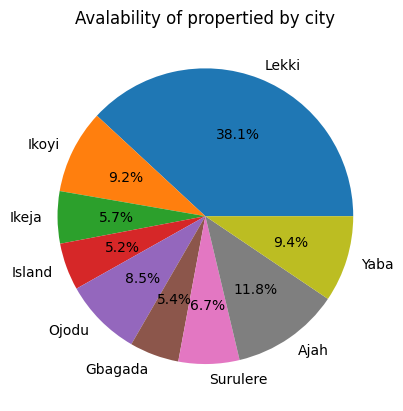

In [27]:
# let's see a chart of the available properties by cities


# create a function to plot pie charts
def plot_pie_chart(data, label, title):
    fig, ax = plt.subplots()
    ax.pie(data, labels=label, autopct='%1.1f%%')
    plt.title(title)
    plt.show()
    return


properties_in_city = []
for city in cities:
    df_by_city = df.loc[df.City == city]
    num_of_properties = len(df_by_city)
    properties_in_city.append(num_of_properties)
    print('there are ' + str(num_of_properties) + " properties in " + city)

plot_pie_chart(properties_in_city, cities, 'Availability of properties by city')

Text(0.5, 1.0, 'Number of Bedrooms by Availability')

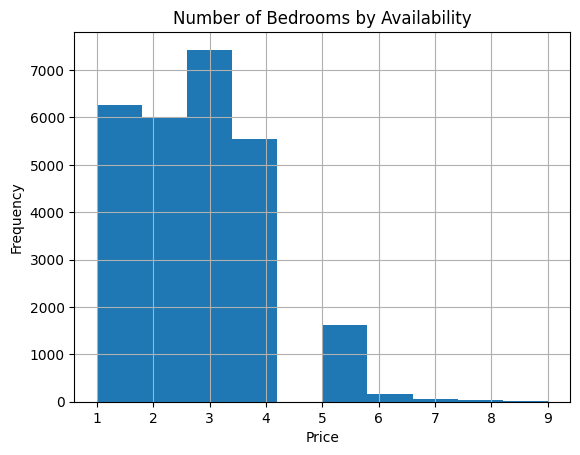

In [29]:
# number of bedrooms by availability

df['Bedrooms'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Number of Bedrooms by Availability')

<Axes: xlabel='Bedrooms', ylabel='Count'>

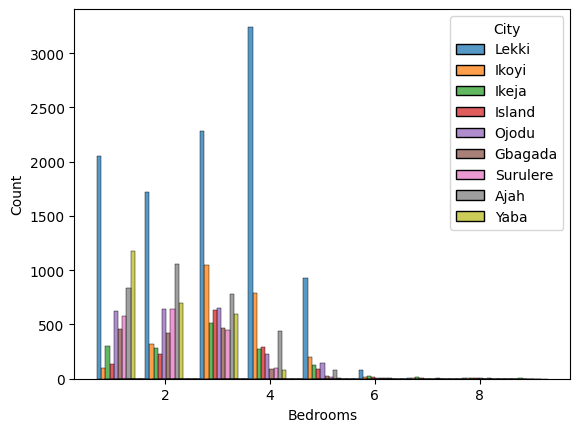

In [14]:
# plot the number of available properties based on the number of bedrooms, grouped by location
import seaborn as sns
sns.histplot(data=df, x='Bedrooms', hue='City', multiple='dodge', shrink=5.5)

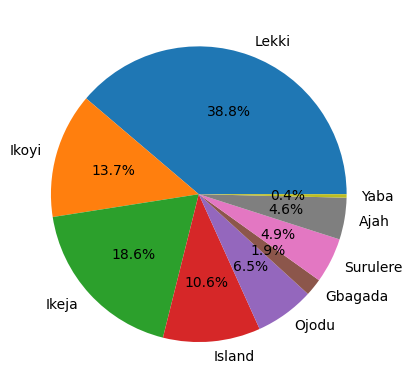

In [28]:
# the data shows that there are few properties with more than 5 bedrooms
# let's look at the areas that have 6 bedrooms or more


def plot_available_properties_by_city(dataframe):
    city_list = dataframe['City'].unique().tolist()
    properties = []
    for city_ in city_list:
        df_by_city_ = dataframe.loc[dataframe.City == city_]
        properties.append(len(df_by_city_))
    plot_pie_chart(properties, city_list, '')


plot_available_properties_by_city(df.loc[df.Bedrooms >= 6])

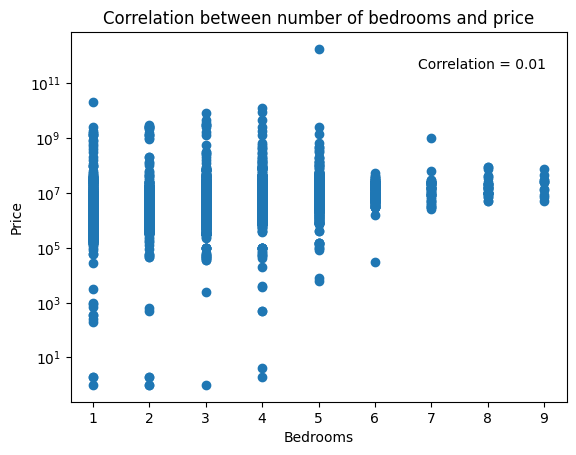

In [26]:
# plot a scatter diagram to see the correlation between the number of bedrooms and the price of the property
import scipy.stats as stats

plt.scatter(df['Bedrooms'], df['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.yscale('log')
plt.title('Correlation between number of bedrooms and price')
# Calculate Annotate correlation coefficient
ax = plt.gca()
r, p = stats.pearsonr(df['Bedrooms'], df['Price'])
plt.annotate('Correlation = {:.2f}'.format(r), xy=(0.7, 0.9), xycoords=ax.transAxes)
plt.show()

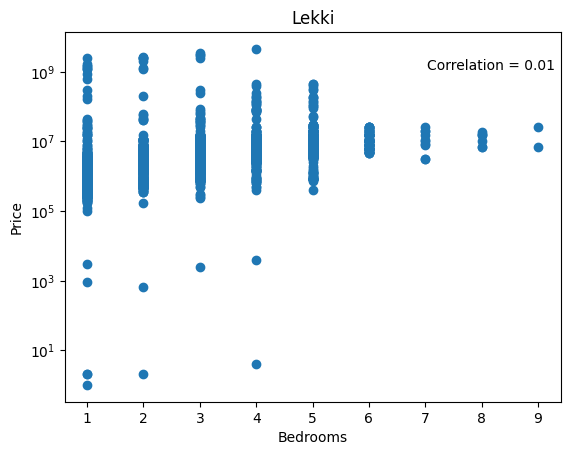

Correlation for Lekki: r = 0.01, p-value = 0.061028


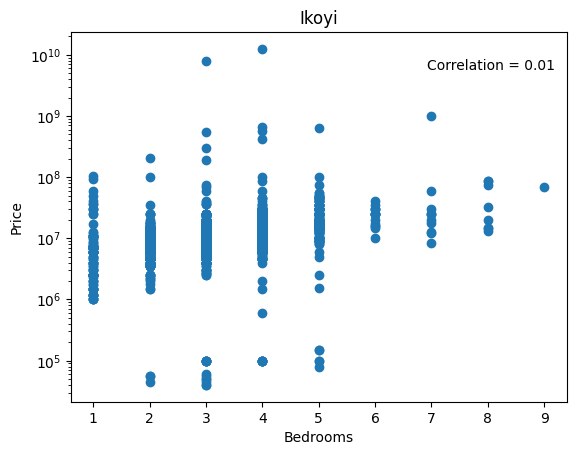

Correlation for Ikoyi: r = 0.01, p-value = 0.061028


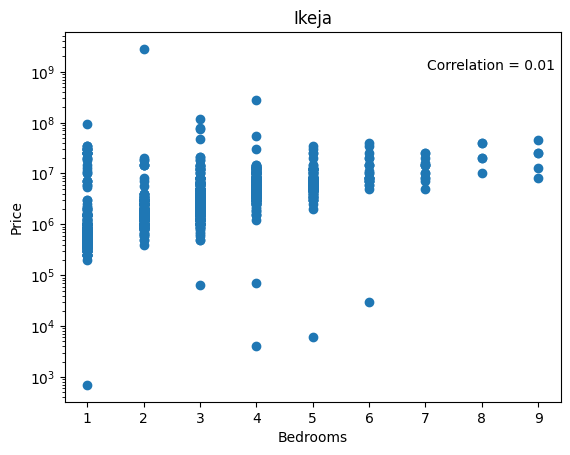

Correlation for Ikeja: r = 0.01, p-value = 0.061028


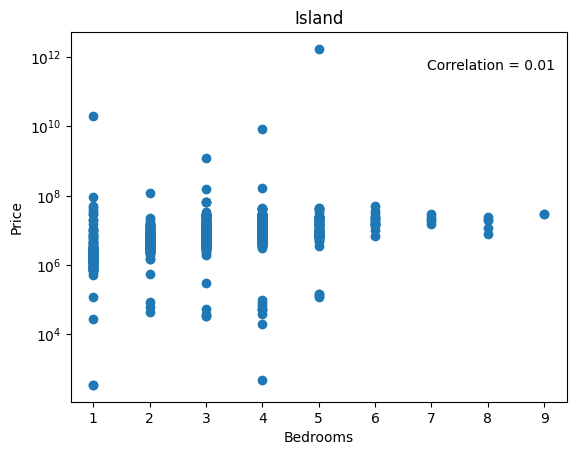

Correlation for Island: r = 0.01, p-value = 0.061028


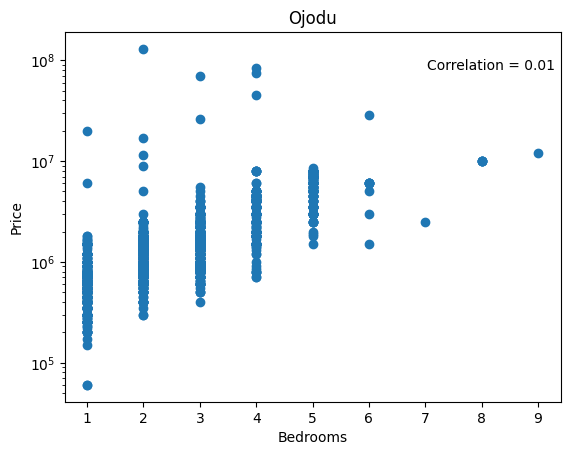

Correlation for Ojodu: r = 0.01, p-value = 0.061028


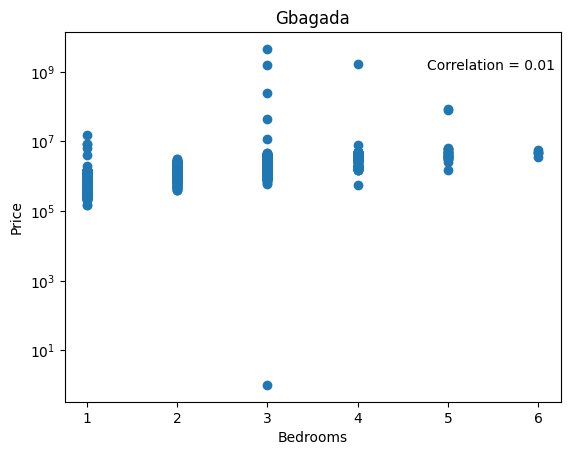

Correlation for Gbagada: r = 0.01, p-value = 0.061028


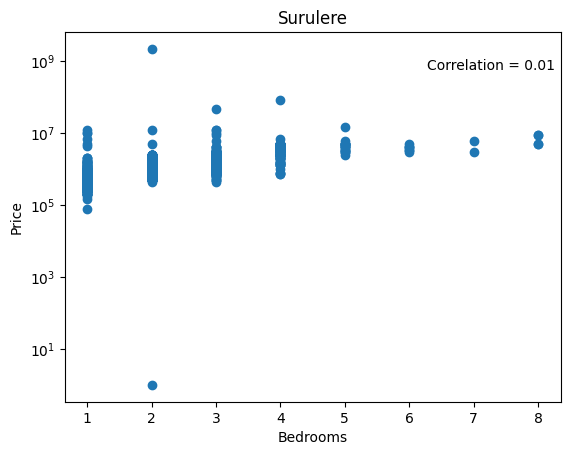

Correlation for Surulere: r = 0.01, p-value = 0.061028


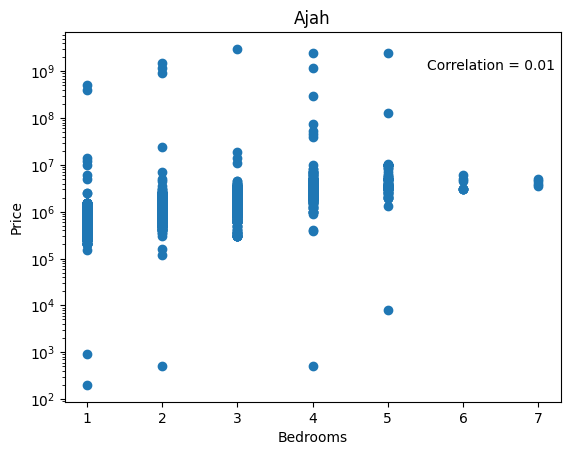

Correlation for Ajah: r = 0.01, p-value = 0.061028


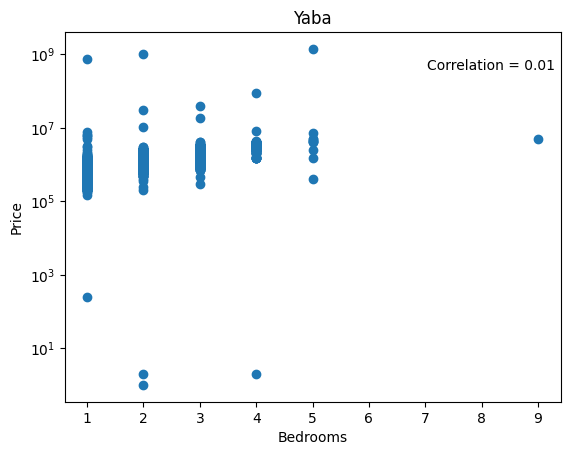

Correlation for Yaba: r = 0.01, p-value = 0.061028


In [17]:
# let's plot the graph based on the location/city


# plot scatter diagram
def plot_bedroom_price_scatter_diagram(dataframe, title):
    plt.scatter(dataframe['Bedrooms'], dataframe['Price'])
    plt.xlabel('Bedrooms')
    plt.ylabel('Price')
    plt.yscale('log')
    plt.title(title)
    # Calculate Annotate correlation coefficient
    ax_ = plt.gca()
    r_, p_ = stats.pearsonr(df['Bedrooms'], df['Price'])
    plt.annotate('Correlation = {:.2f}'.format(r_), xy=(0.7, 0.9), xycoords=ax.transAxes)
    plt.show()
    return
    

for city in cities:
    plot_bedroom_price_scatter_diagram(df.loc[df.City == city], city)
    r, p_value = stats.pearsonr(df['Bedrooms'], df['Price'])
    print(f"Correlation for {city}: r = {r:.2f}, p-value = {p_value:.6f}")

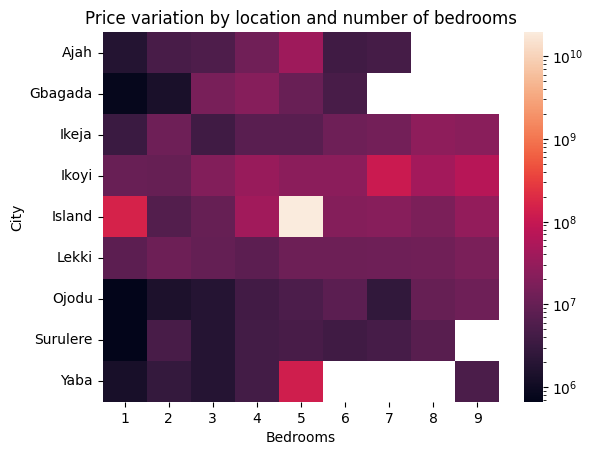

In [25]:
# plot a heatmap showing the price variation by location and number of bedrooms
from matplotlib.colors import LogNorm

pt = df.pivot_table(values= 'Price', index='City', columns='Bedrooms')
sns.heatmap(pt, norm=LogNorm())
plt.title('Price variation by city and number of bedrooms')
plt.show()